In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from mono_functions import create_mono_df,locate_max
from statistics import mean
from scipy.optimize import curve_fit

In [3]:
#choose filepath to desired data
path =  "/Volumes/KESU/mono_data/"
name =  "cam1_test.h5" 

In [23]:
#Plotting Options
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.style.use('seaborn-whitegrid')

textwidth = 5.9

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["font.family"] = "Times New Roman"

In [24]:
#will create a df and print the names of the keys in the original hdf5 file
df = create_mono_df(path,name)

Keys: <KeysViewHDF5 ['images', 'response', 'std', 'wavelengths']>


In [5]:
df

,images,response,std,wavelengths
0,"[[24264, 24251, 24259, 24272, 24272, 24262, 24...",24259.764413,10.659045,6.000000
1,"[[24263, 24249, 24260, 24267, 24272, 24260, 24...",24259.504950,10.634185,6.101266
2,"[[24242, 24236, 24236, 24230, 24234, 24236, 24...",24233.742575,11.106672,6.202532
3,"[[24210, 24204, 24210, 24195, 24203, 24206, 24...",24203.596550,11.568092,6.303797
4,"[[24176, 24173, 24166, 24177, 24180, 24164, 24...",24172.070650,11.391913,6.405063
...,...,...,...,...
75,"[[23525, 23535, 23521, 23527, 23515, 23516, 23...",23545.984887,29.625795,13.594937
76,"[[23504, 23524, 23522, 23516, 23514, 23517, 23...",23538.780237,29.892960,13.696203
77,"[[23491, 23515, 23496, 23499, 23506, 23507, 23...",23526.491375,29.926303,13.797468
78,"[[23482, 23502, 23492, 23495, 23493, 23496, 23...",23520.743050,30.342831,13.898734


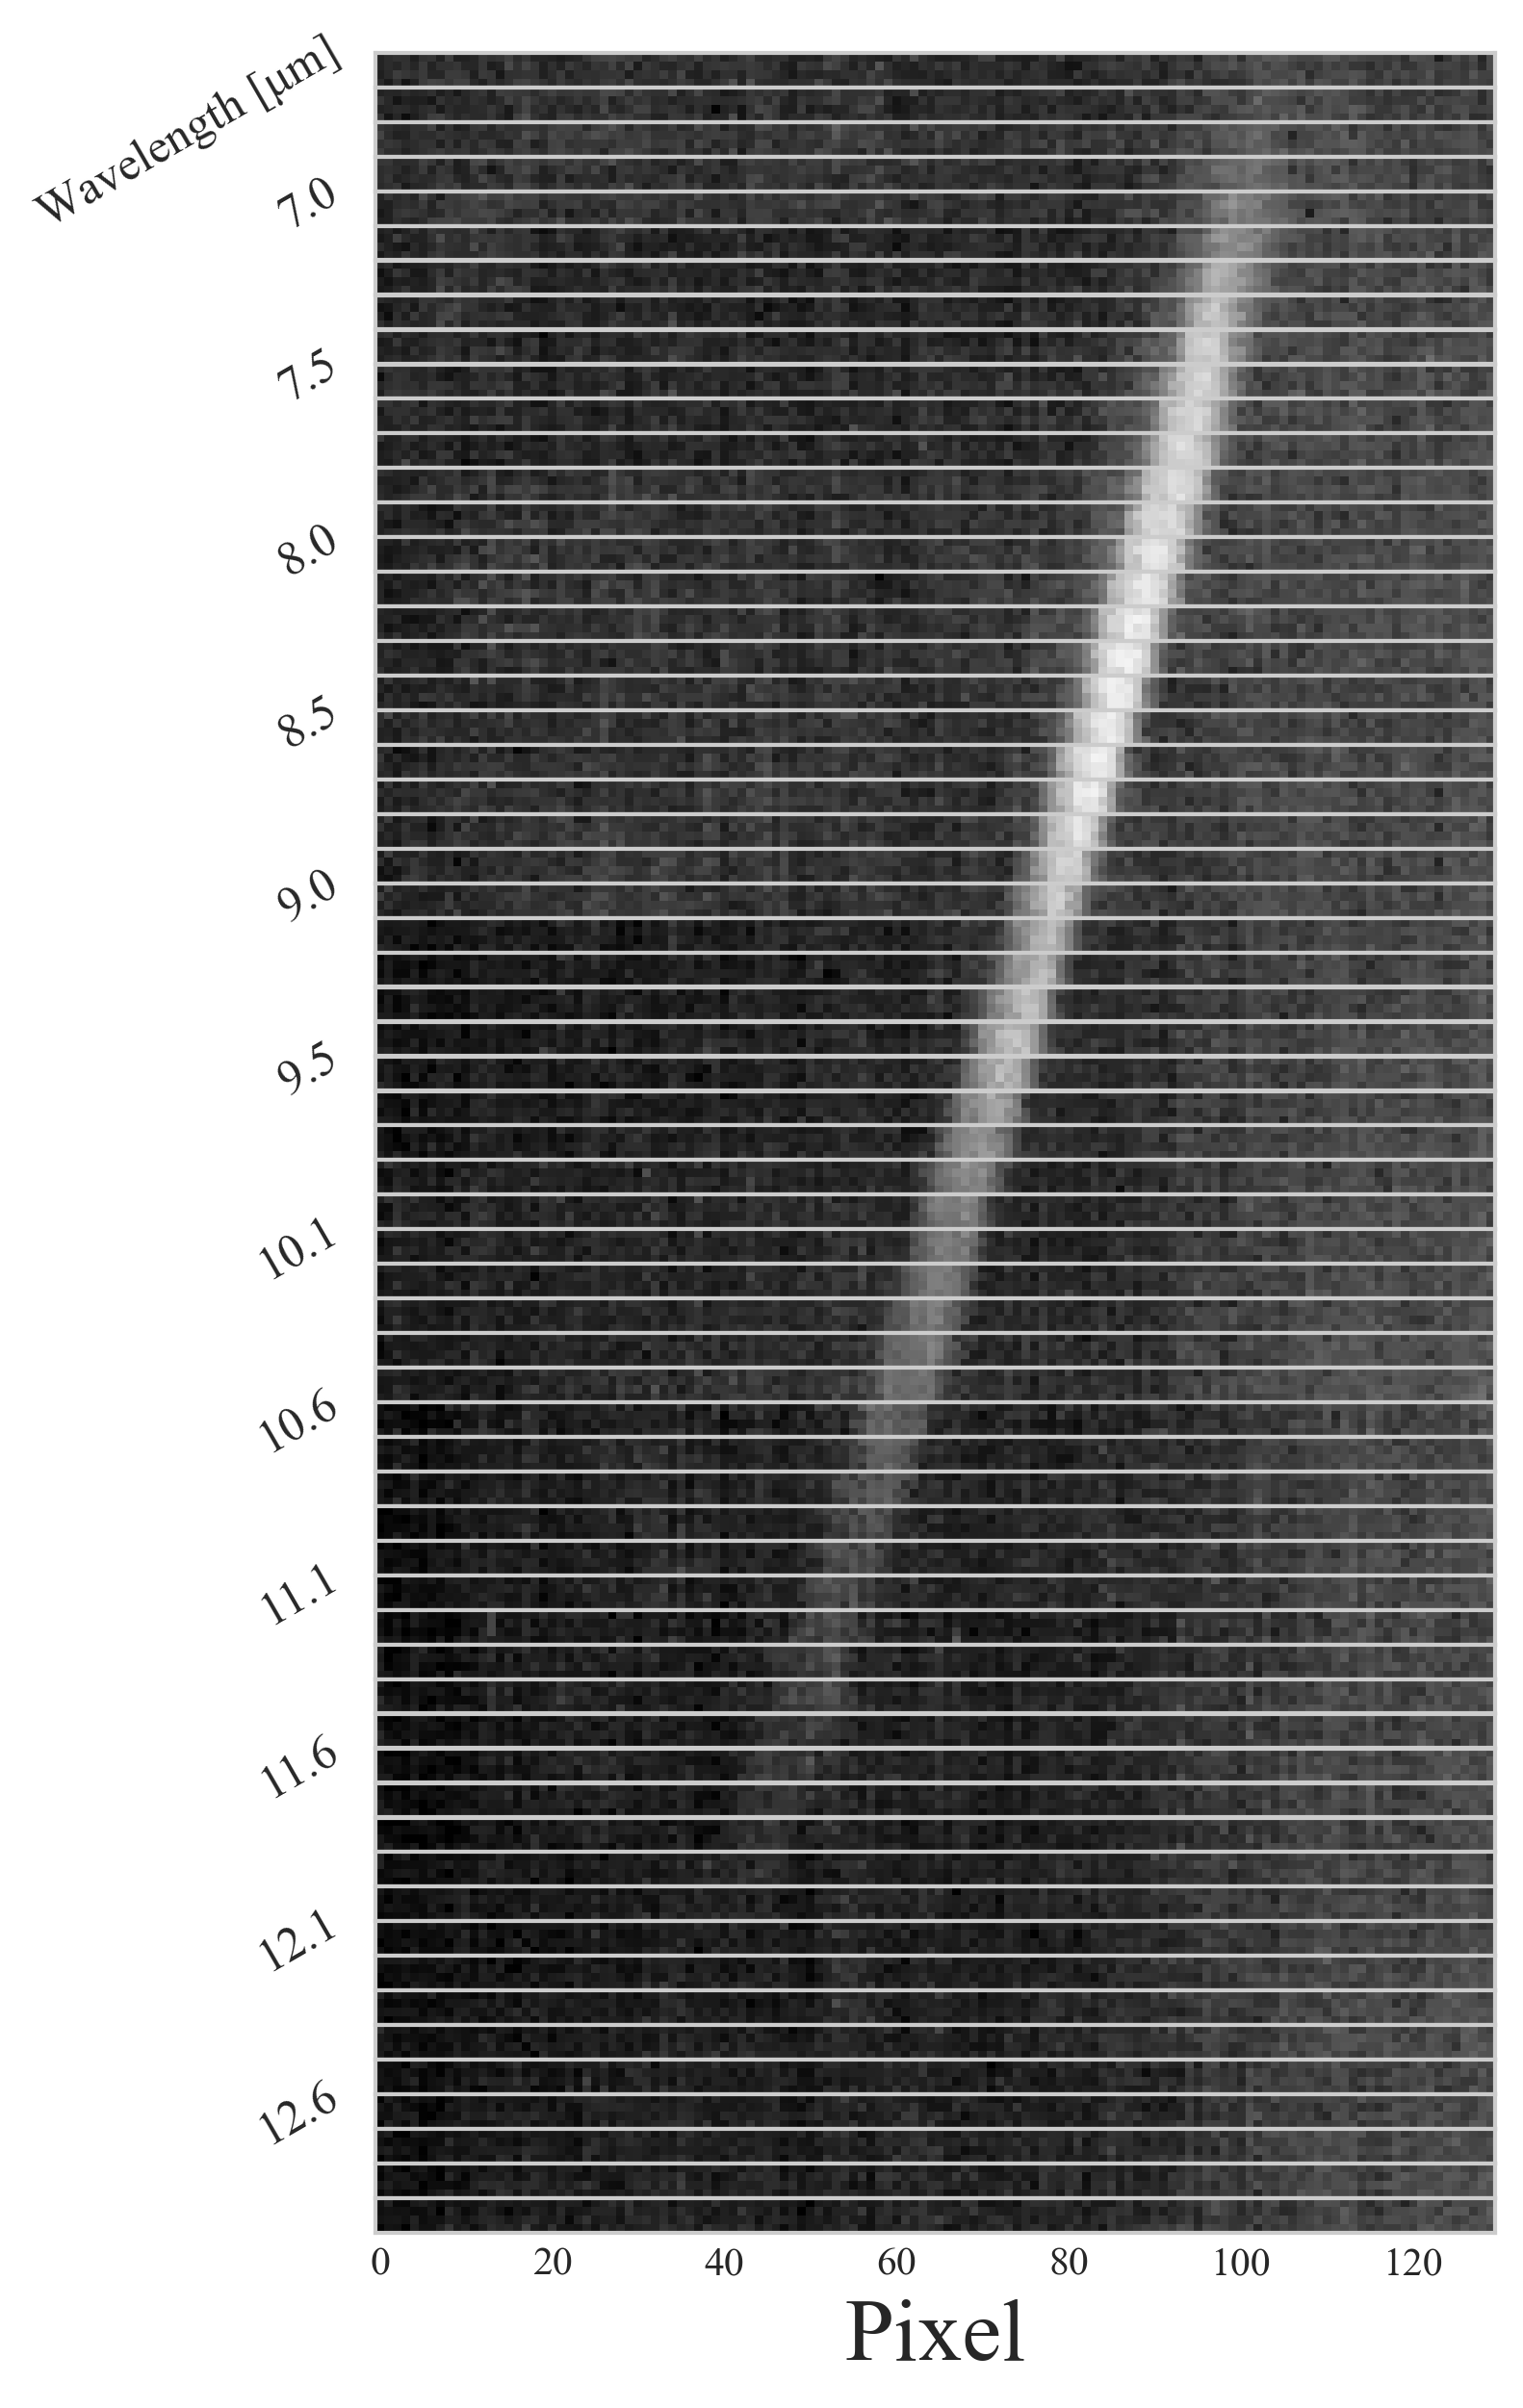

In [144]:

xmin= 60; xmax=190; ymin=114; ymax=118;
ROI= [xmin,xmax,ymin,ymax]

fig,axes = plt.subplots(63, figsize = [5,10],sharex = True)
for i in range(6,69):
    axes[i-6].imshow(df["images"][i][ymin:ymax,xmin:xmax],vmin = df["response"][i]-40,vmax =df["response"][i]+150,cmap = "Greys_r")
    #plt.colorbar()
    
    if i%5 == 0:
        axes[i-6].axes.yaxis.set_ticklabels([])
        axes[i-6].set_ylabel(str(np.round(df['wavelengths'][i],1)), rotation=30, ha='right')
       
    else:
        axes[i-6].yaxis.set_visible(False)
    axes[i-6].grid(False)

axes[0].yaxis.set_visible(True)
axes[0].axes.yaxis.set_ticklabels([])
axes[0].set_ylabel("Wavelength [$\mathdefault{\mu m}$]", rotation=30, ha='right')
axes[i-6].set_xlabel('Pixel',fontsize = 22)
plt.subplots_adjust(wspace=0, hspace=0)
plt.gcf().set_dpi(300)
plt.show()


In [100]:
[value,loc] = locate_max(df,'images',30,ymin,ymax,xmin,xmax,-1)
loc


array([78, 79, 79, 78])

In [116]:
#calculate location of maxvalues, add to database
maxlocs = []
maxvals = []

for i in range(0,len(df["wavelengths"])):
    [loc,value] = locate_max(df,'images',i,ymin,ymax,xmin,xmax,-1)
    maxlocs.append(value)
    maxvals.append(loc)

df['max_vals'] = pd.Series(maxvals) 
df['max_locs'] = pd.Series(maxlocs) 
df['avg_val'] = df['max_vals'].map(mean)
df['std_val'] = df['max_vals'].map(np.std)
df['avg_locs'] = df['max_locs'].map(mean)
df

,images,response,std,wavelengths,max_vals,max_locs,avg_val,avg_locs,fit,std_val
0,"[[24264, 24251, 24259, 24272, 24272, 24262, 24...",24259.764413,10.659045,6.000000,"[24361, 24371, 24360, 24358]","[96, 95, 95, 96]",24362,95,112.982308,5.024938
1,"[[24263, 24249, 24260, 24267, 24272, 24260, 24...",24259.504950,10.634185,6.101266,"[24352, 24360, 24346, 24355]","[96, 95, 95, 96]",24353,95,111.820000,5.068284
2,"[[24242, 24236, 24236, 24230, 24234, 24236, 24...",24233.742575,11.106672,6.202532,"[24249, 24250, 24253, 24248]","[125, 126, 126, 126]",24250,125,110.657692,1.870829
3,"[[24210, 24204, 24210, 24195, 24203, 24206, 24...",24203.596550,11.568092,6.303797,"[24221, 24221, 24224, 24221]","[113, 87, 110, 127]",24221,109,109.495385,1.299038
4,"[[24176, 24173, 24166, 24177, 24180, 24164, 24...",24172.070650,11.391913,6.405063,"[24189, 24189, 24193, 24191]","[109, 104, 105, 110]",24190,107,108.333077,1.658312
...,...,...,...,...,...,...,...,...,...,...
75,"[[23525, 23535, 23521, 23527, 23515, 23516, 23...",23545.984887,29.625795,13.594937,"[23561, 23560, 23564, 23563]","[124, 117, 129, 113]",23562,120,25.809231,1.581139
76,"[[23504, 23524, 23522, 23516, 23514, 23517, 23...",23538.780237,29.892960,13.696203,"[23548, 23548, 23554, 23549]","[114, 125, 129, 107]",23549,118,24.646923,2.487469
77,"[[23491, 23515, 23496, 23499, 23506, 23507, 23...",23526.491375,29.926303,13.797468,"[23537, 23539, 23538, 23541]","[110, 114, 128, 113]",23538,116,23.484615,1.479020
78,"[[23482, 23502, 23492, 23495, 23493, 23496, 23...",23520.743050,30.342831,13.898734,"[23536, 23535, 23539, 23532]","[111, 125, 111, 111]",23535,114,22.322308,2.500000


In [108]:
# pixel fit 
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B


#fit over wavelengths with lowest noise
fitmin=15;
fitmax = 40;
popt, pcov = curve_fit(f, df['wavelengths'][fitmin:fitmax], df['avg_locs'][fitmin:fitmax]) # your data x, y to fit

In [103]:
df['fit'] =  popt[0] *  df['wavelengths'] + popt[1]

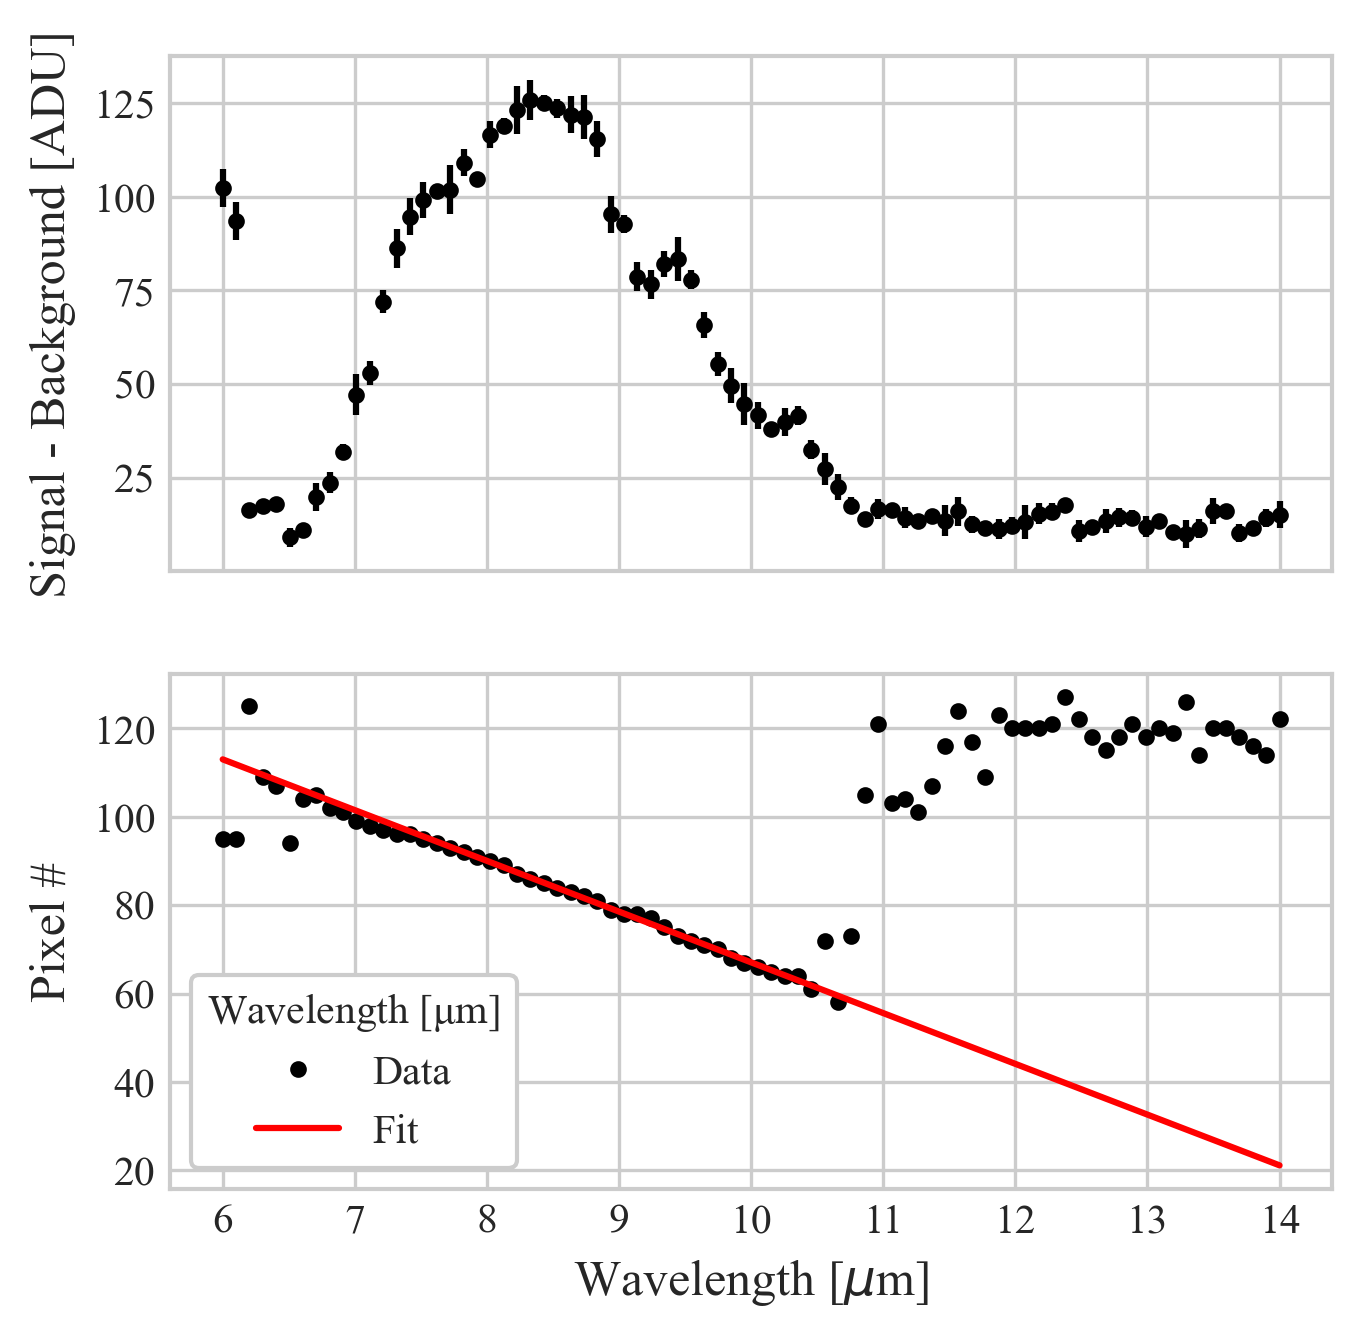

In [136]:
#plot and check fit 
fig,axes = plt.subplots(2, figsize = [5,5],sharex = True)
plt.subplot(211)
plt.errorbar(df['wavelengths'],df['avg_val']-df['response'],yerr = df['std_val'],fmt = '.k')
plt.ylabel('Signal - Background [ADU]')
plt.subplot(212)
plt.plot(df['wavelengths'],df['avg_locs'],'k.',label = "Data")
plt.plot(df['wavelengths'],df['fit'],'r-',label = 'Fit')
plt.xlabel('Wavelength [$\mu $m]')
plt.ylabel('Pixel #')
legend = plt.legend(title = 'Wavelength [$\mathdefault{\mu m}$]',framealpha=1, frameon=True)
legend.get_frame().set_facecolor('w')
plt.gcf().set_dpi(300)
plt.show()

In [536]:
#writetohdf5

#choose filepath to desired data
save_path =  "C://Users//khart//Documents//IRCSP2_data//calibration_files//"
name =  "cam1pixel" 

#create hdf5 file
hf = h5py.File(save_path + name + '.h5', 'w')
hf.create_dataset('/fitparams',  data=popt)
hf.create_dataset('/ROI',        data= ROI)
hf.close()


In [323]:
rount(df['fit'][1]

71.62000002554097

In [478]:
np.mean(df["images"][10][ymin:ymax,xmin:xmax])

24085.74